# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

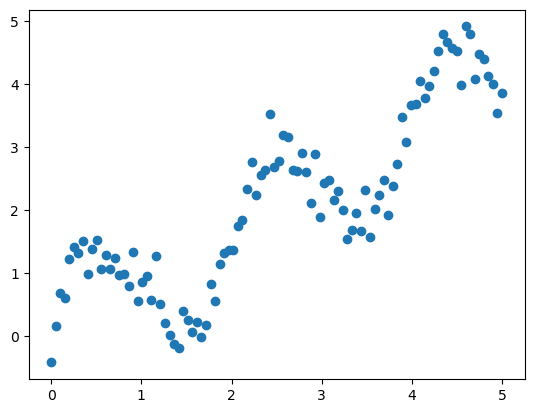

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5606067212281833


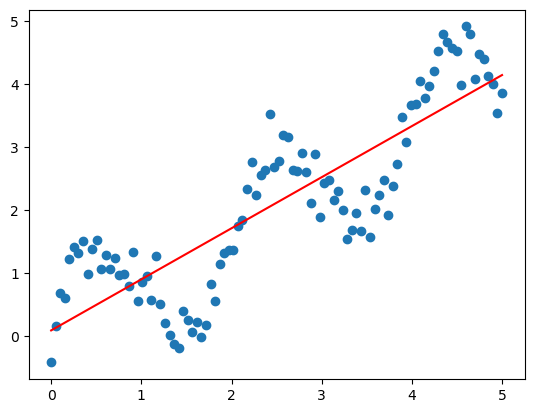

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [9]:
print(x.shape)

(100,)


In [8]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

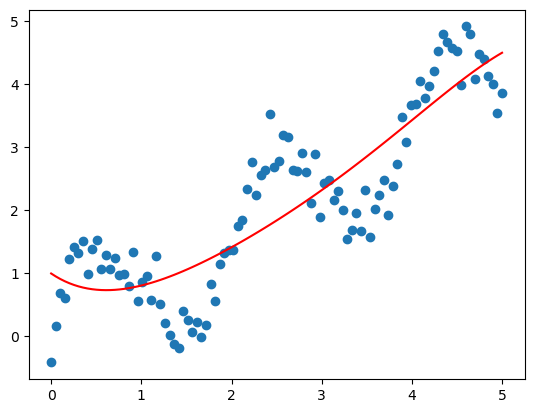

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.9676052   1.06159685 -0.34319505  0.062276   -0.00454965]
interception:  0.9910243509089436


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.99102435, 0.94481947, 0.9037707 , 0.86762713, 0.83614721,
       0.80909858, 0.78625789, 0.76741061, 0.75235086, 0.74088124,
       0.73281262, 0.72796399, 0.72616229, 0.72724217, 0.73104588,
       0.73742306, 0.74623055, 0.75733225, 0.77059888, 0.78590786,
       0.80314309, 0.8221948 , 0.84295935, 0.86533905, 0.88924199,
       0.91458187, 0.9412778 , 0.96925412, 0.99844026, 1.0287705 ,
       1.06018383, 1.09262377, 1.12603818, 1.16037907, 1.19560244,
       1.23166812, 1.26853952, 1.30618353, 1.34457029, 1.38367303,
       1.42346789, 1.46393374, 1.50505198, 1.54680641, 1.58918299,
       1.63216971, 1.67575639, 1.71993448, 1.76469692, 1.81003795,
       1.85595291, 1.90243807, 1.94949046, 1.9971077 , 2.04528777,
       2.09402891, 2.14332937, 2.19318725, 2.24360034, 2.29456594,
       2.34608066, 2.39814023, 2.45073937, 2.50387156, 2.5575289 ,
       2.6117019 , 2.66637931, 2.72154796, 2.77719253, 2.83329544,
       2.88983663, 2.94679336, 3.00414008, 3.06184823, 3.11988

In [15]:
regr_poly.predict(X_poly)

array([0.99102435, 0.94481947, 0.9037707 , 0.86762713, 0.83614721,
       0.80909858, 0.78625789, 0.76741061, 0.75235086, 0.74088124,
       0.73281262, 0.72796399, 0.72616229, 0.72724217, 0.73104588,
       0.73742306, 0.74623055, 0.75733225, 0.77059888, 0.78590786,
       0.80314309, 0.8221948 , 0.84295935, 0.86533905, 0.88924199,
       0.91458187, 0.9412778 , 0.96925412, 0.99844026, 1.0287705 ,
       1.06018383, 1.09262377, 1.12603818, 1.16037907, 1.19560244,
       1.23166812, 1.26853952, 1.30618353, 1.34457029, 1.38367303,
       1.42346789, 1.46393374, 1.50505198, 1.54680641, 1.58918299,
       1.63216971, 1.67575639, 1.71993448, 1.76469692, 1.81003795,
       1.85595291, 1.90243807, 1.94949046, 1.9971077 , 2.04528777,
       2.09402891, 2.14332937, 2.19318725, 2.24360034, 2.29456594,
       2.34608066, 2.39814023, 2.45073937, 2.50387156, 2.5575289 ,
       2.6117019 , 2.66637931, 2.72154796, 2.77719253, 2.83329544,
       2.88983663, 2.94679336, 3.00414008, 3.06184823, 3.11988

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

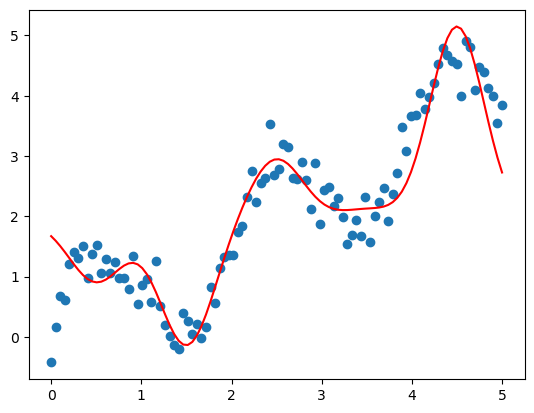

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.00935682 -2.06049626  1.03221425  0.18982918  3.22499333]
interception:  1.9232134631365243


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

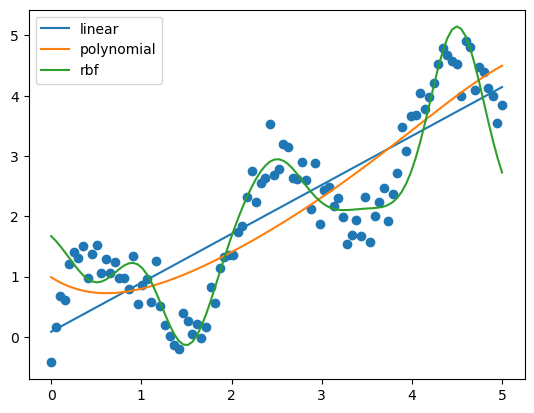

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5606067212281833


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.47943017864821363


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.22995292339747245
